<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;">Contents:
  
* Ways of detecting missing values
* Standard and non-standard missing values
* Basic imputation methods for replacing missing values
* Identifying and removing Duplicates from your data
* Outlier detection - visually
* Outlier detection - by Z-scores
* Replacing outliers by median
* Outlier detection - by IQR
* Replacing outliers by whiskers
* Remove or modify incorrect or unwanted observations
    

# Dealing with Missing Values
Here we will discuss how to find and deal with missing values in a datast.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">  Importing the library:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">  Reading the data:

In [40]:
#The dataset has information about some cities and states.

In [4]:
Data = pd.read_csv('data (3).csv')  # read the data
Data.head()

,Number,City,Colors Reported,Shape Reported,State,Time
0,123456.0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,54321.0,Willingboro,green,NaN,NJ,6/30/1930 20:00
2,87654.0,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,3456.0,Abilene,blue,DISK,KS,1/12/1900 0:00
4,7654.0,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


* Observe the data and see if you can recognise missing values or 'garbage' values in the data
* Data type of missing values don't necessarily have to be np.nan
* Based on the context we often decide what should be a missing value and what qualifies as valid data

# Dealing with Duplicates in your data

In [5]:
##Identify duplicates records in the data
dupes = Data.duplicated()
sum(dupes)

13

In [6]:
##here we can see that there are 13 duplicated rows. We want to remove the duplicate rows.

#Removing Duplicates
Data =Data.drop_duplicates()

In [7]:
#Now check the duplicate data again and you will see that there are no duplicate rows.
dupes = Data.duplicated()
sum(dupes)

0

# Dealing with Missing Values in your data

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">  Standard Missing Values


Going back to our original dataset, let’s take a look at the “Number” column.

![alt text](missing1.png "Standard missing values")


In [8]:
# What isnull() function recognises as missing value

pd.DataFrame({'value' : Data['Number'], 'Missing?' : Data['Number'].isnull()}) 

,value,Missing?
0,123456.0,False
1,54321.0,False
2,87654.0,False
3,3456.0,False
4,7654.0,False
5,NaN,True
6,87654.0,False
7,6789.0,False
8,NaN,True
9,4567.0,False


* 'NaN' is recognised as missing value

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">  Non-Standard Missing Values

![alt text](missing2.png "Non-Standard missing values")


In [9]:
# what isnull() does not recognise as missing value

pd.DataFrame({'value' : Data['Shape Reported'], 'Missing value?' : Data['Shape Reported'].isnull()})

,value,Missing value?
0,TRIANGLE,False
1,NaN,True
2,OVAL,False
3,DISK,False
4,LIGHT,False
5,NaN,True
6,CIRCLE,False
7,DISK,False
8,12,False
9,CYLINDER,False


* Only 'NaN' is recognised as missing value
* Depending on the context, we decide what should be a missing value

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">  Unexpected Missing Values

In [10]:
pd.DataFrame({'value': Data['State'], 'Missing?': Data['State'].isnull()})

,value,Missing?
0,NY,False
1,NJ,False
2,CO,False
3,KS,False
4,NY,False
5,N,False
6,CA,False
7,MI,False
8,AK,False
9,NaN,True


* Because all the fields are names of states, 5th element and 12th element can be considered as garbage values

In [11]:
# number of missing values (only the ones recognised as missing values) in each of the attributes
pd.DataFrame( Data.isnull().sum(), columns= ['Number of missing values'])

,Number of missing values
Number,3
City,0
Colors Reported,9
Shape Reported,2
State,1
Time,0


### Any missing values?

In [12]:
Data.isnull().values.any()   # Any of the values in the dataframe is a missing value

True

### Total number of missing values

In [13]:
Data.isnull().sum().sum()  # Total number of recognised missing values in the entire dataframe

15

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">  Replacing Missing Values
    

There are many values in which missing values can be replaced by different values which is often called
as imputing missing values. It depends on your data and the problem you are trying to solve. In the below cell different types of missing value imputations are shown.

In [14]:
# Replacing NaN with a custom value
Data['Number'].fillna(12345, inplace = True)   

# Replace NaN values with the mean of the column
# Data['Number'].fillna(Data.Number.mean(), inplace = True)  

# Replace NaN values with the median of the column
# Data['Number'].fillna(Data.Number.median(), inplace = True)  

Data

,Number,City,Colors Reported,Shape Reported,State,Time
0,123456.0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,54321.0,Willingboro,green,NaN,NJ,6/30/1930 20:00
2,87654.0,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,3456.0,Abilene,blue,DISK,KS,1/12/1900 0:00
4,7654.0,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
5,12345.0,Valley City,NaN,NaN,N,9/15/1934 15:30
6,87654.0,Crater Lake,yellow,CIRCLE,CA,6/15/1935 0:00
7,6789.0,Alma,NaN,DISK,MI,7/15/1936 0:00
8,12345.0,Eklutna,green,12,AK,10/15/1936 17:00
9,4567.0,Hubbard,red,CYLINDER,NaN,6/15/1937 0:00


### Location based replacement

In [15]:
Data.loc[2,'Number'] = 1234  # replace a value at a specific location
Data

,Number,City,Colors Reported,Shape Reported,State,Time
0,123456.0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,54321.0,Willingboro,green,NaN,NJ,6/30/1930 20:00
2,1234.0,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,3456.0,Abilene,blue,DISK,KS,1/12/1900 0:00
4,7654.0,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
5,12345.0,Valley City,NaN,NaN,N,9/15/1934 15:30
6,87654.0,Crater Lake,yellow,CIRCLE,CA,6/15/1935 0:00
7,6789.0,Alma,NaN,DISK,MI,7/15/1936 0:00
8,12345.0,Eklutna,green,12,AK,10/15/1936 17:00
9,4567.0,Hubbard,red,CYLINDER,NaN,6/15/1937 0:00


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">   Droping Rows with Missing Values

In [16]:
Data.dropna(inplace=True)  # Drops all the rows that have atleast one missing values
Data.isnull().sum()


Number             0
City               0
Colors Reported    0
Shape Reported     0
State              0
Time               0
dtype: int64

In [17]:
Data

,Number,City,Colors Reported,Shape Reported,State,Time
3,3456.0,Abilene,blue,DISK,KS,1/12/1900 0:00
6,87654.0,Crater Lake,yellow,CIRCLE,CA,6/15/1935 0:00
8,12345.0,Eklutna,green,12,AK,10/15/1936 17:00
12,6543.0,Belton,red,SPHERE,Y,6/30/1939 20:00
19,6543.0,Belton,red,???,Y,6/30/1939 20:00
20,876.0,Keokuk,not known,@,IA,7/7/1939 2:00
21,5432.0,Ludington,*****,DISK,MI,6/1/1941 13:00


* Getting rid of rows with missing values is the easiest way of dealing with their presence
* But the downside is that we lose valid data from other columns which do not have missing values for that particular row

# Dealing with incorrect or unwanted observations

In [18]:
Data.tail()

,Number,City,Colors Reported,Shape Reported,State,Time
8,12345.0,Eklutna,green,12,AK,10/15/1936 17:00
12,6543.0,Belton,red,SPHERE,Y,6/30/1939 20:00
19,6543.0,Belton,red,???,Y,6/30/1939 20:00
20,876.0,Keokuk,not known,@,IA,7/7/1939 2:00
21,5432.0,Ludington,*****,DISK,MI,6/1/1941 13:00


Here you can see some incorrect and currupted values like **** and @ in your data.
You need to look for such values manually sometime and you can also use summary stats or plots to find such values.

# These values can be modified based on the problem you are trying to solve and what is required for your case.
Here we can say that **** value can be replaced by null or most common color value and @ is also like a null value which can be imputed based on the methods shown above.


In [19]:
## Try modifying these incorrect values based on your case.

# Dealing with Outliers 
In the part given below we will discuss outliers in a dataset.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">  About DataSet :
    
**We will be using Boston House Pricing Dataset which is included in the sklearn dataset API. We will load the dataset and separate out the features and targets.**

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Importing the library:

In [21]:
from sklearn.datasets import fetch_california_housing



<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Loading the data

In [22]:
boston = fetch_california_housing()
x = boston.data
y = boston.target
columns = boston.feature_names

In [34]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [23]:
boston_df = pd.DataFrame(boston.data)
boston_df.columns = columns
boston_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [30]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Discover outliers with visualization tools

### Box plot-

In [28]:
columns

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

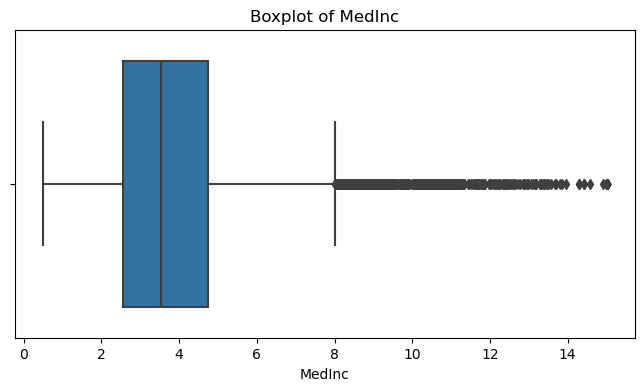

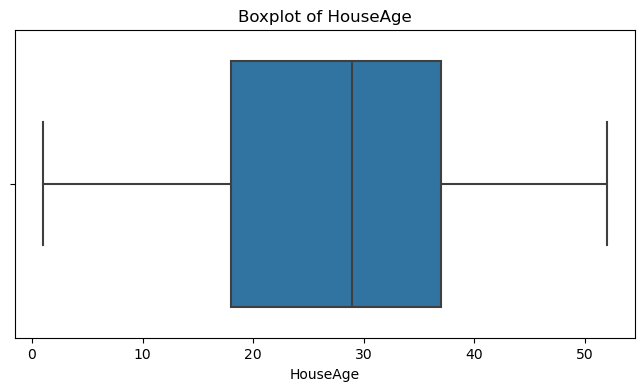

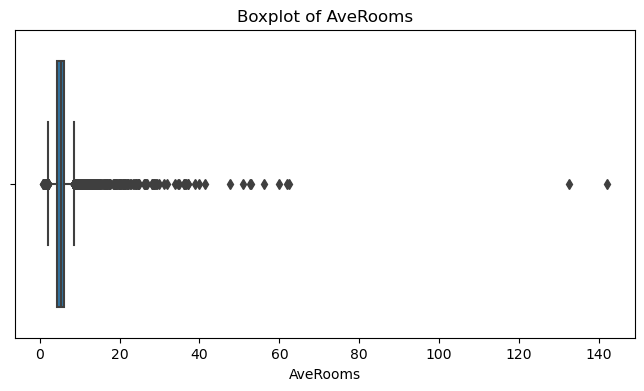

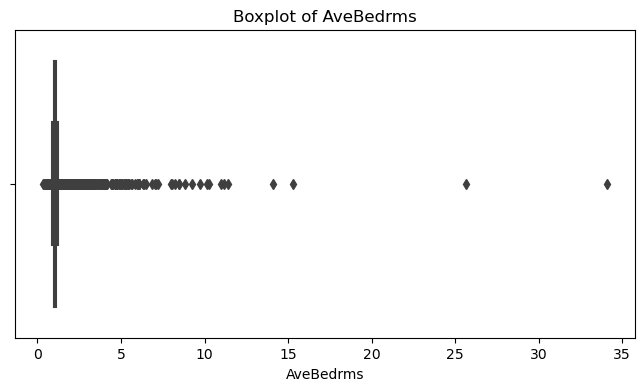

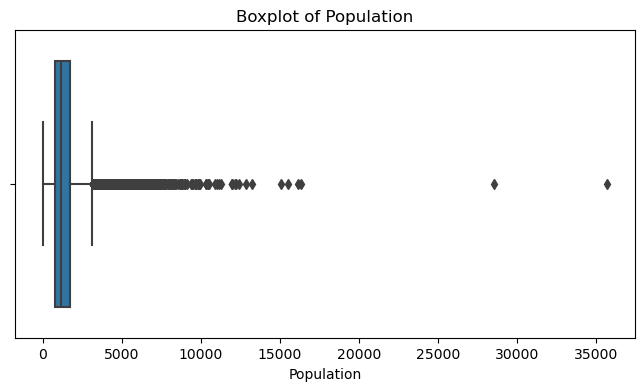

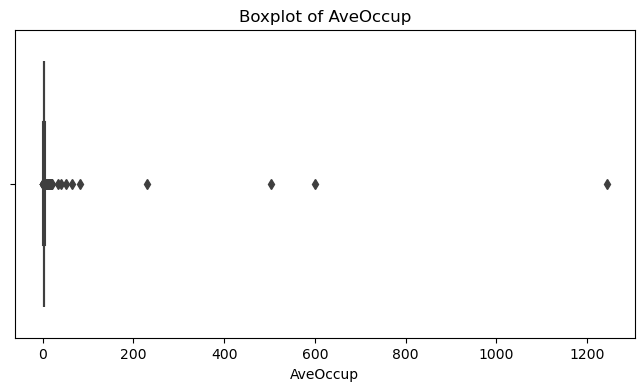

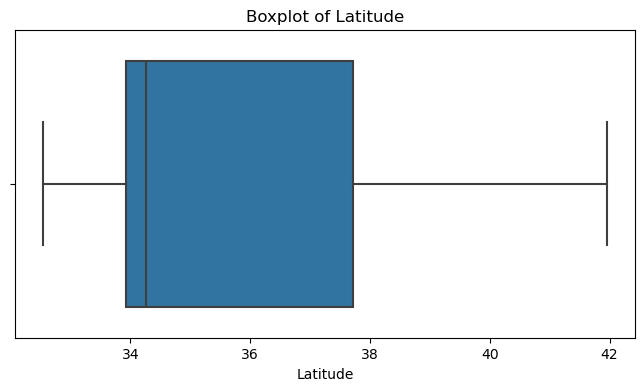

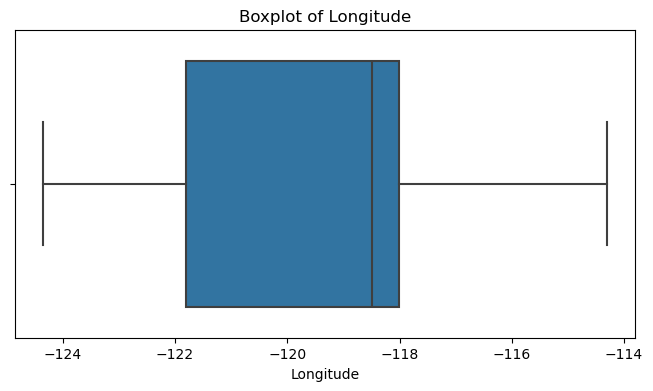

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

c = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

for i in c:
    plt.figure(figsize=(8, 4))  # Adjust the figure size as needed
    sns.boxplot(data=boston_df, x=i)
    plt.title(f'Boxplot of {i}')
    plt.show()



**Note:** Above plot shows three points between 10 to 12, these are outliers as there are not included in the box of other observation i.e no where near the quartiles.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Scatter plot-

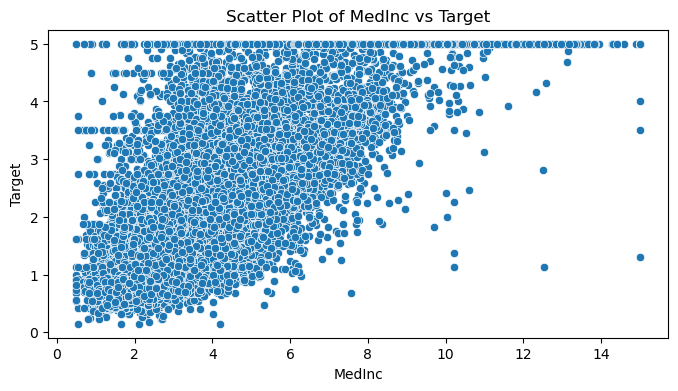

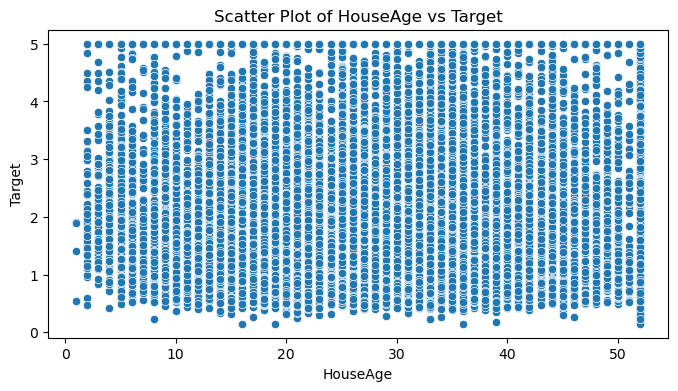

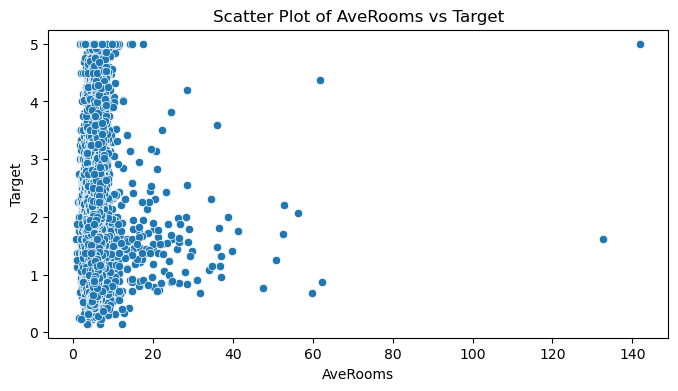

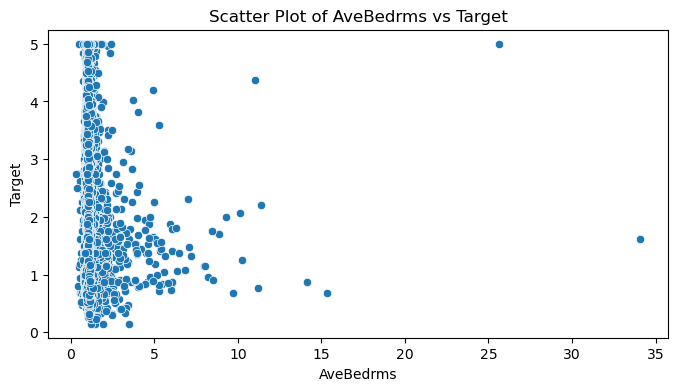

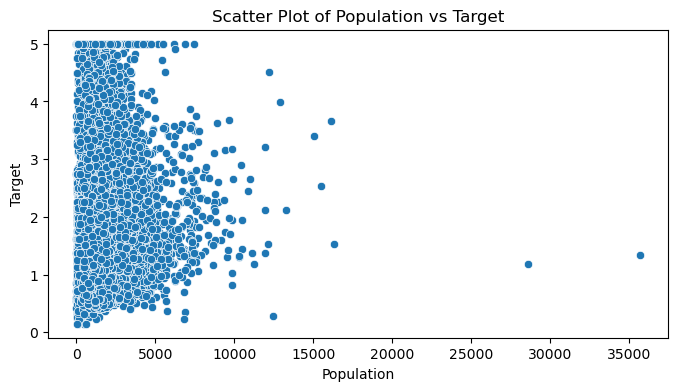

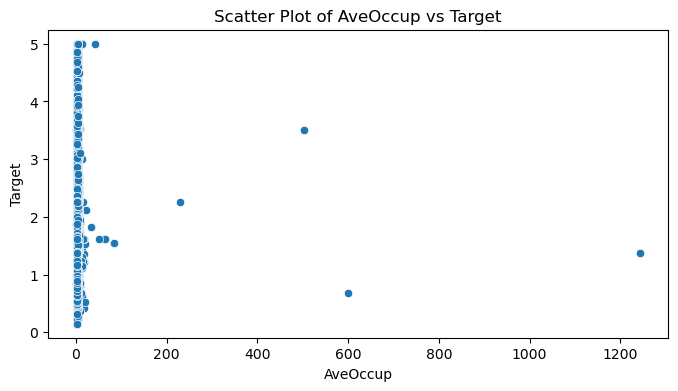

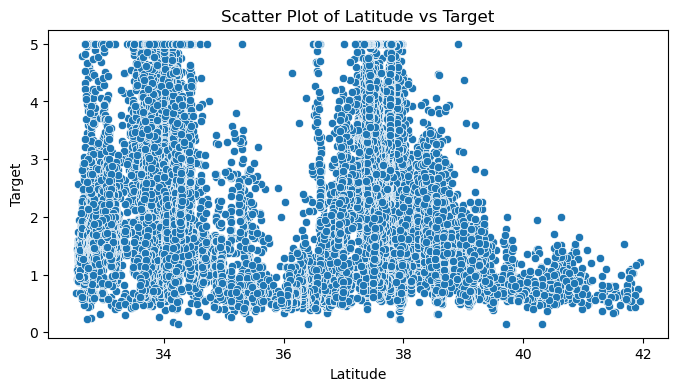

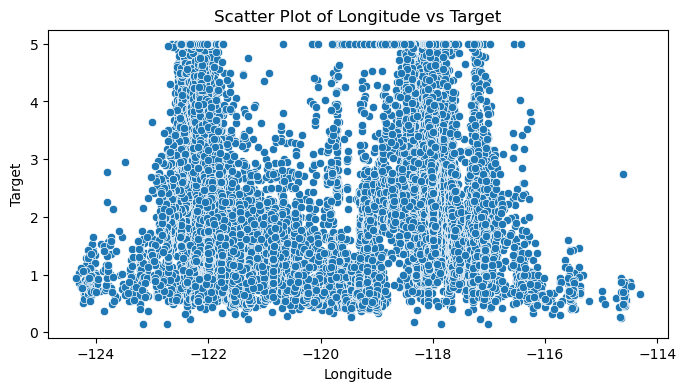

In [35]:
c = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

# Scatter plots with the target variable
for i in c:
    plt.figure(figsize=(8, 4))  # Adjust the figure size as needed
    sns.scatterplot(data=boston_df, x=i, y=y)  # Replace 'Target' with your actual target column
    plt.title(f'Scatter Plot of {i} vs Target')
    plt.xlabel(i)
    plt.ylabel('Target')
    plt.show()


**Note:** Looking at the plot above, we can see most of data points are lying on the bottom left side but there are points which are far from the population like top right corner. Those are potential outliers.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Discover outliers with statistical rules
 ## Z-Score-

In [36]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(boston_df))   # get the z-score of every value with respect to their columns
print(z)

         MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
0      2.344766  0.982143  0.628559   0.153758    0.974429  0.049597   
1      2.332238  0.607019  0.327041   0.263336    0.861439  0.092512   
2      1.782699  1.856182  1.155620   0.049016    0.820777  0.025843   
3      0.932968  1.856182  0.156966   0.049833    0.766028  0.050329   
4      0.012881  1.856182  0.344711   0.032906    0.759847  0.085616   
...         ...       ...       ...        ...         ...       ...   
20635  1.216128  0.289187  0.155023   0.077354    0.512592  0.049110   
20636  0.691593  0.845393  0.276881   0.462365    0.944405  0.005021   
20637  1.142593  0.924851  0.090318   0.049414    0.369537  0.071735   
20638  1.054583  0.845393  0.040211   0.158778    0.604429  0.091225   
20639  0.780129  1.004309  0.070443   0.138403    0.033977  0.043682   

       Latitude  Longitude  
0      1.052548   1.327835  
1      1.043185   1.322844  
2      1.038503   1.332827  
3      1.038503   1

**Note:** Looking the code and the output above, it is difficult to say which data point is an outlier. Let’s try and define a threshold to identify an outlier.

In [37]:
threshold = 3
np.where(z > threshold)

(array([  131,   283,   409,   510,   511,   512,   514,   570,   576,
          710,   780,   799,   864,   865,   867,   869,   871,   922,
          923,   977,   985,   986,   995,  1010,  1021,  1024,  1024,
         1039,  1060,  1086,  1102,  1102,  1233,  1233,  1234,  1234,
         1235,  1235,  1238,  1238,  1239,  1239,  1240,  1240,  1541,
         1560,  1561,  1563,  1564,  1566,  1566,  1574,  1582,  1583,
         1586,  1591,  1593,  1602,  1617,  1621,  1636,  1637,  1642,
         1644,  1645,  1646,  1700,  1867,  1867,  1872,  1872,  1879,
         1889,  1889,  1910,  1910,  1911,  1911,  1912,  1912,  1913,
         1913,  1914,  1914,  1925,  1926,  1926,  1930,  1978,  1978,
         1979,  1979,  2025,  2119,  2213,  2294,  2311,  2392,  2392,
         2395,  2395,  2396,  2396,  2397,  2397,  2398,  2398,  2511,
         2511,  2776,  2826,  2963,  2969,  2975,  2978,  2999,  3004,
         3086,  3086,  3167,  3177,  3258,  3258,  3292,  3334,  3350,
      

**Note:** The first array contains the list of row numbers and second array respective column numbers, which mean z[55][1] have a Z-score higher than 3.

**55th record on column ZN is an outlier.**

## IQR  -

In [39]:
Q1 = boston_df.quantile(0.25)
Q3 = boston_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

MedInc          2.179850
HouseAge       19.000000
AveRooms        1.611665
AveBedrms       0.093447
Population    938.000000
AveOccup        0.852520
Latitude        3.780000
Longitude       3.790000
dtype: float64


In [40]:
np.where((boston_df < (Q1 - 1.5 * IQR)) | (boston_df > (Q3 + 1.5 * IQR)))

(array([    0,     1,    41, ..., 20621, 20629, 20636], dtype=int64),
 array([0, 0, 3, ..., 3, 4, 3], dtype=int64))

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Working with Outliers: Correcting, Removing

### 1. Z-Score

In [41]:
boston_df1 = boston_df[(z < 3).all(axis=1)]    # Select only the rows without a single outlier
boston_df1.shape, boston_df.shape

((19794, 8), (20640, 8))

In [42]:
boston_df2 = boston_df.copy()   #make a copy of the dataframe

#Replace all the outliers with median values. This will create new some outliers but, we will ignore them

for i, j in zip(np.where(z > threshold)[0], np.where(z > threshold)[1]):# iterate using 2 variables.i for rows and j for columns
    boston_df2.iloc[i,j] = boston_df.iloc[:,j].median()  # replace i,jth element with the median of j i.e, corresponding column

In [43]:
z = np.abs(stats.zscore(boston_df2))
np.where(z > threshold)  # New outliers detected after imputing the original outliers


(array([   62,    63,    67, ..., 20527, 20539, 20621], dtype=int64),
 array([3, 3, 3, ..., 5, 4, 3], dtype=int64))

### 2. IQR Score 

Just like Z-score we can use previously calculated IQR score to filter out the outliers by keeping only valid values.

In [44]:
boston_df_out = boston_df[~((boston_df < (Q1 - 1.5 * IQR)) |(boston_df > (Q3 + 1.5 * IQR))).any(axis=1)] # rows without outliers
boston_df_out.shape

(16842, 8)

In [45]:
boston_df4 = boston_df.copy()

# Replace every outlier on the lower side by the lower whisker
for i, j in zip(np.where(boston_df4 < Q1 - 1.5 * IQR)[0], np.where(boston_df4 < Q1 - 1.5 * IQR)[1]): 
    
    whisker  = Q1 - 1.5 * IQR
    boston_df4.iloc[i,j] = whisker[j]
    
    
#Replace every outlier on the upper side by the upper whisker    
for i, j in zip(np.where(boston_df4 > Q3 + 1.5 * IQR)[0], np.where(boston_df4 > Q3 + 1.5 * IQR)[1]):
    
    whisker  = Q3 + 1.5 * IQR
    boston_df4.iloc[i,j] = whisker[j]
    

C:\Users\DELL\AppData\Local\Temp\ipykernel_10728\262078515.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  boston_df4.iloc[i,j] = whisker[j]
C:\Users\DELL\AppData\Local\Temp\ipykernel_10728\262078515.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  boston_df4.iloc[i,j] = whisker[j]


In [46]:
boston_df4.shape, boston_df.shape

((20640, 8), (20640, 8))